# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from umap.umap_ import UMAP

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat dataset
df = pd.read_csv('Dataset_inisiasi.csv')
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [4]:
df.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [5]:
df.isnull().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [6]:
# mendefinisikan numerik dan kategorikal features
categorical_features = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']
numerical_features = ['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
                     'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
                     'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score',
                     'Weekly_Voyage_Count', 'Average_Load_Percentage']

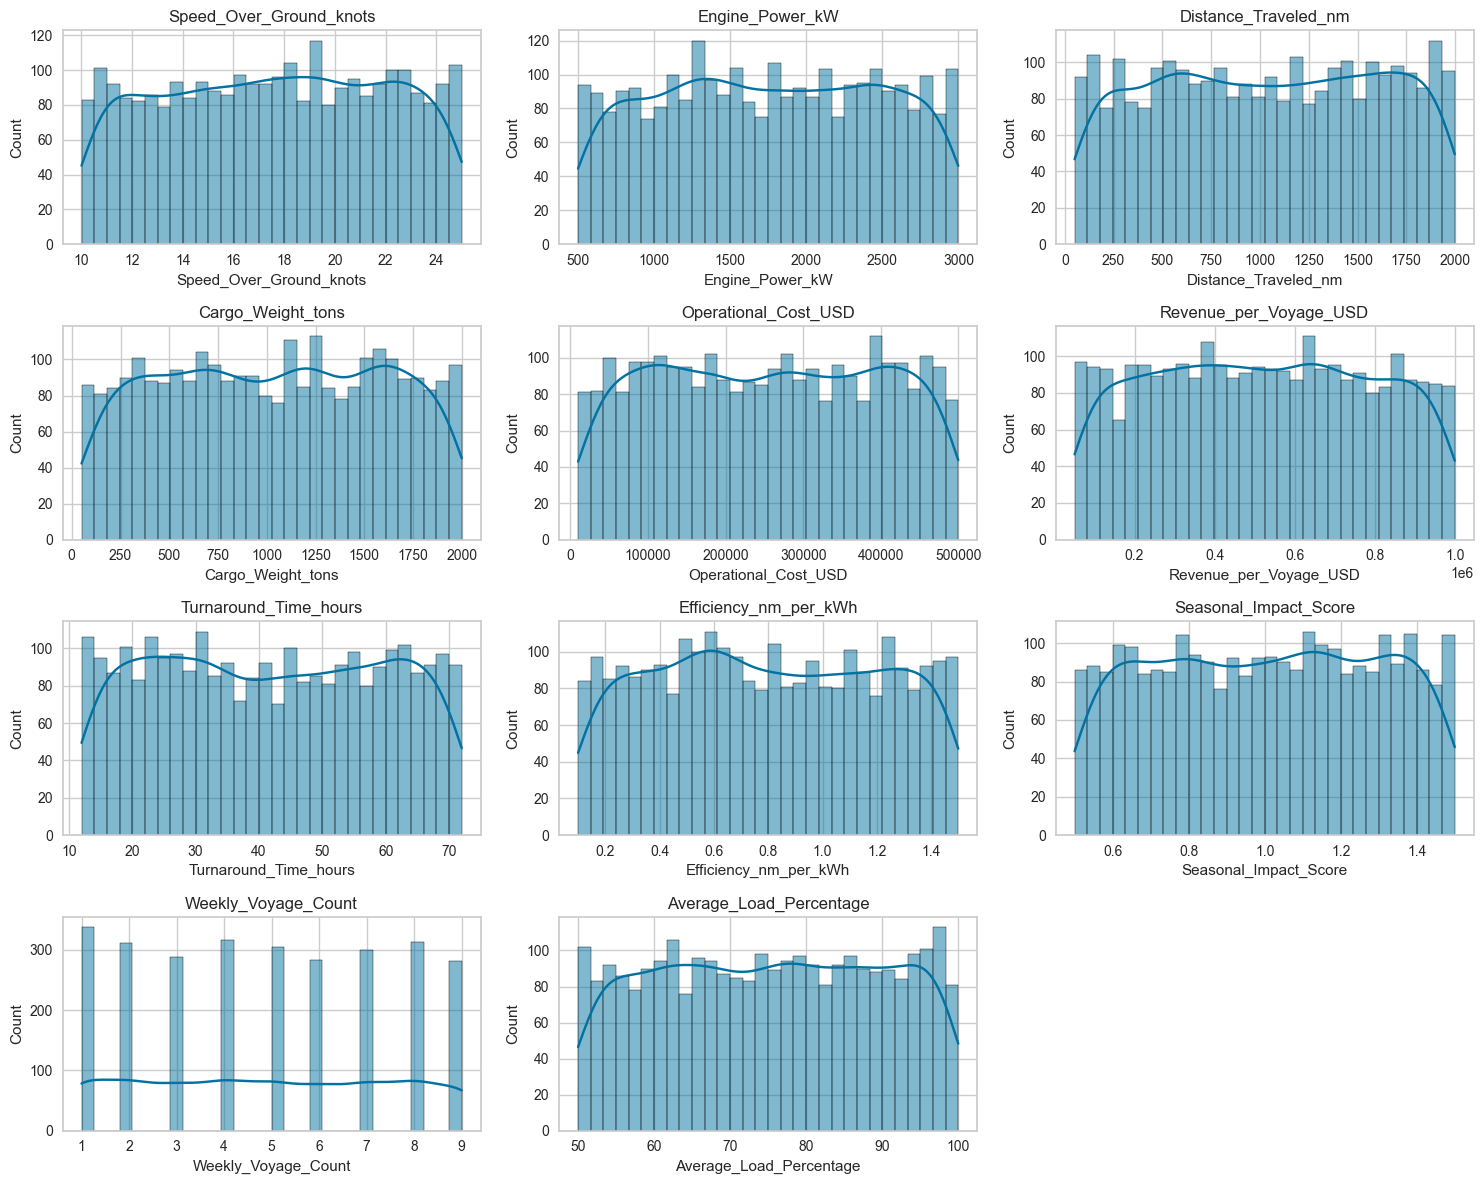

In [7]:
# plot distribusi fitur numerik
plt.figure(figsize=(15, 12))
for index, feature in enumerate(numerical_features):
    plt.subplot(4, 3, index+1)
    sns.histplot(data=df[feature], kde=True, bins=30)
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()

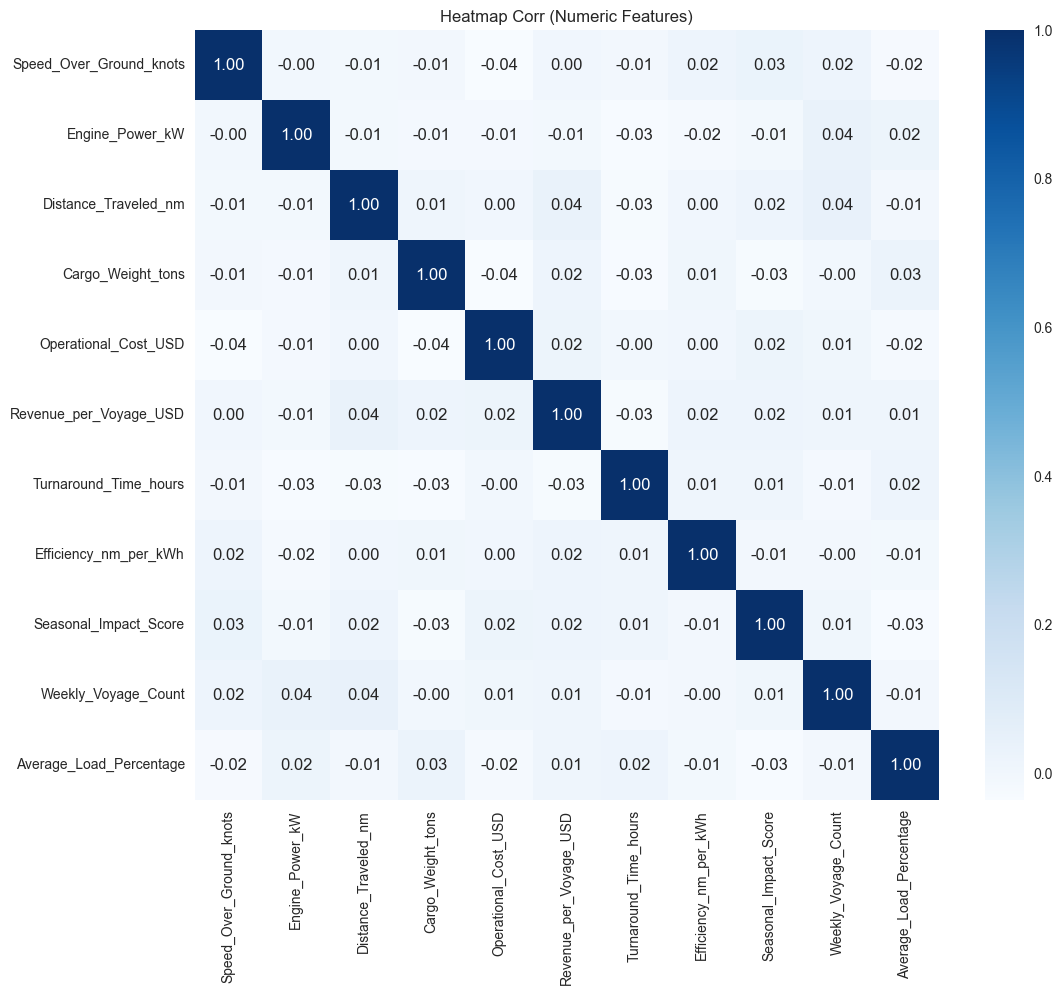

In [8]:
# plot korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title("Heatmap Corr (Numeric Features)")
plt.show()

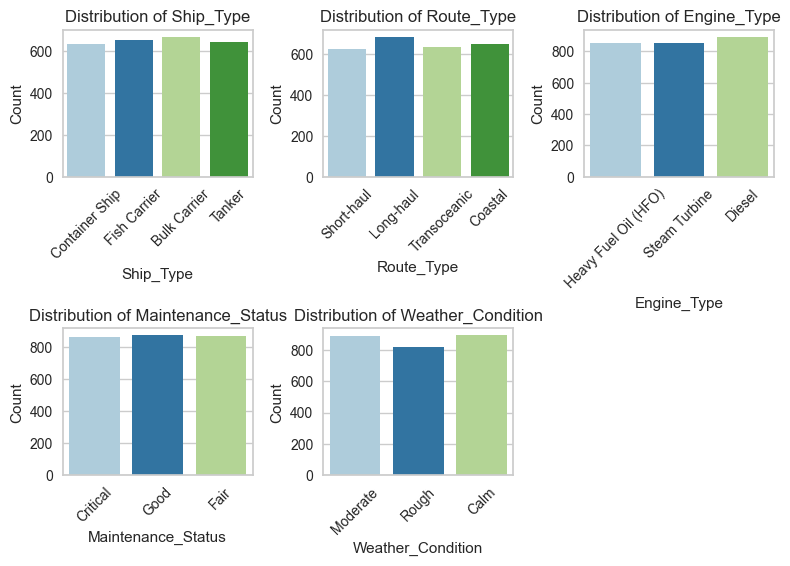

In [9]:
# distribusi fitur kategorikal
fig = plt.figure(figsize=(8, 8))
position = 1

for feature in categorical_features:
    if position <= len(categorical_features):
        axis = fig.add_subplot(3, 3, position)
        sns.countplot(x=feature, data=df, palette="Paired", ax=axis)
        axis.set_title(f"Distribution of {feature}")
        axis.set_xlabel(feature)
        axis.set_ylabel("Count")
        plt.setp(axis.get_xticklabels(), rotation=45)
    position += 1

fig.tight_layout()
plt.show()

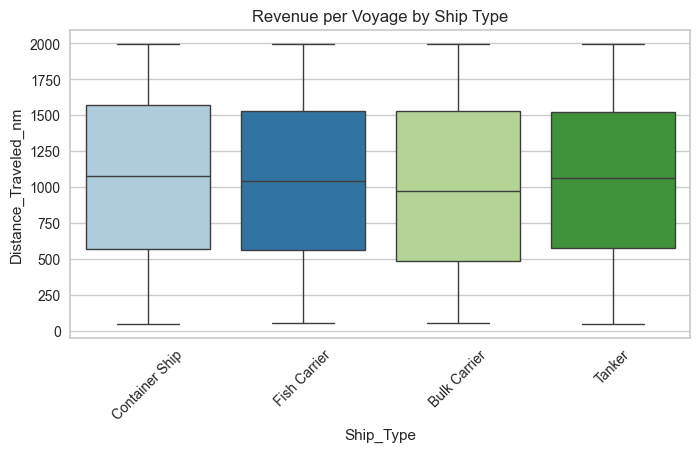

In [10]:
# Distance Traveled by Ship Type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Ship_Type', y='Distance_Traveled_nm', palette="Paired")
plt.title("Revenue per Voyage by Ship Type")
plt.xticks(rotation=45)
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
df.drop(columns=['Date'], inplace=True)
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [12]:
missing_columns = df.columns[df.isnull().any()].tolist()
print(f'Daftar kolom dengan missing value: {missing_columns}')

# menghilangkan missing value
categorical_cols_with_missing = [col for col in df.select_dtypes(include='object').columns if col in missing_columns]

for col in categorical_cols_with_missing:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

Daftar kolom dengan missing value: ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']


Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

In [13]:
# label encoding untuk fitur kategorikal
data_encoded = pd.DataFrame()
encoders = {}

for x in categorical_features:
  encoder = LabelEncoder()
  encoded_col = encoder.fit_transform(df[x])
  data_encoded[x] = encoded_col
  encoders[x] = encoder

data_encoded.sample(5)

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
2605,0,0,1,2,2
2348,2,2,1,2,1
2677,1,2,1,1,2
1759,3,3,1,0,0
1938,0,3,0,0,1


In [14]:
# normalisasi untuk fitur numerik
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[numerical_features])
data_scaled = pd.DataFrame(data_scaled, columns=numerical_features)

data_scaled.sample(5)

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1286,0.912308,0.473337,0.550975,0.192295,0.500458,0.856837,0.680226,0.155450,0.124934,1.000,0.893022
357,0.396134,0.921929,0.852318,0.108315,0.598358,0.871253,0.005469,0.442616,0.556738,0.000,0.135456
2164,0.477458,0.473401,0.002583,0.710408,0.563321,0.388073,0.985826,0.394518,0.488974,0.875,0.055567
1400,0.066540,0.524021,0.038446,0.480003,0.460720,0.821214,0.297145,0.614077,0.879141,0.625,0.708960
1012,0.525184,0.449544,0.133491,0.372201,0.312850,0.261337,0.858065,0.086080,0.168708,0.250,0.203229


In [15]:
# menggabungkan data setelah label encoding dan normalisasi
new_df = pd.concat([data_encoded, data_scaled], axis=1)
new_df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,1,1,1,0,1,0.172666,0.625357,0.503367,0.979420,0.967522,0.254676,0.230969,0.968493,0.916364,0.000,0.875361
1,2,2,2,2,2,0.025210,0.518488,0.518533,0.057553,0.966615,0.877680,0.854481,0.135914,0.385945,0.625,0.877884
2,1,1,0,1,1,0.716607,0.459434,0.312357,0.065581,0.895451,0.361920,0.623798,0.285468,0.906517,1.000,0.924353
3,0,3,2,1,1,0.736981,0.165847,0.552589,0.865698,0.513144,0.039175,0.173291,0.430789,0.871380,0.000,0.323714
4,2,3,0,1,1,0.249079,0.235695,0.716076,0.107941,0.566997,0.659007,0.869660,0.879978,0.083444,0.875,0.600080


In [16]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR setelah normalisasi dan label encoding
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound


get_outlier = {}
for col in numerical_features:
    outliers, lower, upper = detect_outliers_iqr(new_df, col)
    get_outlier[col] = {
        'outliers': outliers,
        'count': len(outliers),
        'lower_bound': lower,
        'upper_bound': upper
    }

# Mencetak hasil deteksi outlier
for col, result in get_outlier.items():
    print(f"\n{col}:")
    print(f"  Jumlah outlier: {result['count']}")
    print(f"  Batas bawah: {result['lower_bound']:.2f}")
    print(f"  Batas atas: {result['upper_bound']:.2f}")


Speed_Over_Ground_knots:
  Jumlah outlier: 0
  Batas bawah: -0.47
  Batas atas: 1.49

Engine_Power_kW:
  Jumlah outlier: 0
  Batas bawah: -0.48
  Batas atas: 1.49

Distance_Traveled_nm:
  Jumlah outlier: 0
  Batas bawah: -0.51
  Batas atas: 1.53

Cargo_Weight_tons:
  Jumlah outlier: 0
  Batas bawah: -0.49
  Batas atas: 1.51

Operational_Cost_USD:
  Jumlah outlier: 0
  Batas bawah: -0.52
  Batas atas: 1.53

Revenue_per_Voyage_USD:
  Jumlah outlier: 0
  Batas bawah: -0.47
  Batas atas: 1.46

Turnaround_Time_hours:
  Jumlah outlier: 0
  Batas bawah: -0.54
  Batas atas: 1.54

Efficiency_nm_per_kWh:
  Jumlah outlier: 0
  Batas bawah: -0.47
  Batas atas: 1.48

Seasonal_Impact_Score:
  Jumlah outlier: 0
  Batas bawah: -0.48
  Batas atas: 1.50

Weekly_Voyage_Count:
  Jumlah outlier: 0
  Batas bawah: -0.50
  Batas atas: 1.50

Average_Load_Percentage:
  Jumlah outlier: 0
  Batas bawah: -0.50
  Batas atas: 1.51


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [17]:
data_kmeans = new_df.copy()
kmeans = KMeans(n_clusters = 4, random_state=42)
clusters = kmeans.fit_predict(new_df)
data_kmeans['Cluster'] = clusters
data_kmeans.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,1,1,1,0,1,0.172666,0.625357,0.503367,0.979420,0.967522,0.254676,0.230969,0.968493,0.916364,0.000,0.875361,3
1,2,2,2,2,2,0.025210,0.518488,0.518533,0.057553,0.966615,0.877680,0.854481,0.135914,0.385945,0.625,0.877884,2
2,1,1,0,1,1,0.716607,0.459434,0.312357,0.065581,0.895451,0.361920,0.623798,0.285468,0.906517,1.000,0.924353,3
3,0,3,2,1,1,0.736981,0.165847,0.552589,0.865698,0.513144,0.039175,0.173291,0.430789,0.871380,0.000,0.323714,0
4,2,3,0,1,1,0.249079,0.235695,0.716076,0.107941,0.566997,0.659007,0.869660,0.879978,0.083444,0.875,0.600080,2


Insight:
- Melatih model menggunakan algoritma K-Means
- Dataset berhasil dikelompokkan ke dalam 4 cluster untuk menunjukkan karakteristik dari masing-masing fitur pada kelompok tertentu.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

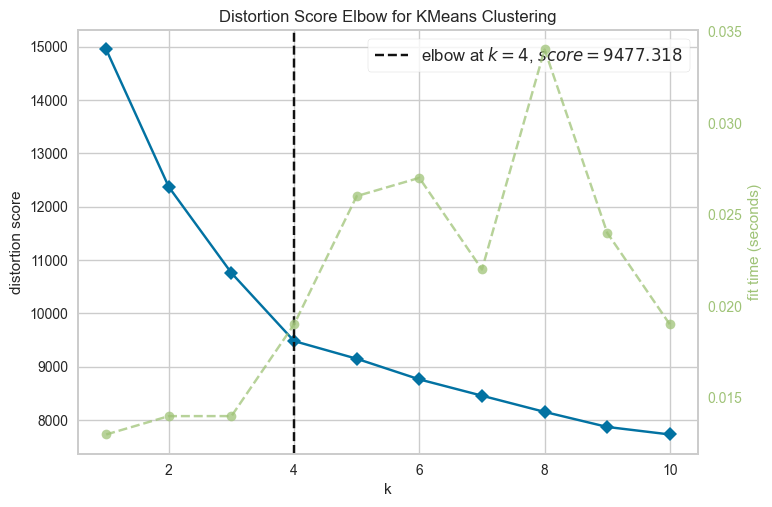

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 11), locate_elbow=True)
visualizer.fit(new_df)
visualizer.show()

Insight:
- Pada grafik menunjukkan bahwa titik elbow berada pada k = 4 dengan terjadi penurunan distortion score secara melambat sehingga cluster yg optimal adalah berjumlah 4 untuk model K-Means pada dataset tersebut.

In [19]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(new_df)

# cek silhouette score
sil_score = silhouette_score(new_df, clusters)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.15910230750808094


Insight:
- Berdasarkan pelatihan model diatas menggunakan nilai k = 4, didapatkan hasil silhouette_score sebesar 0.15 yg berada dibawah minimal nilai silhouette score yg diharapkan yakni > 0.7

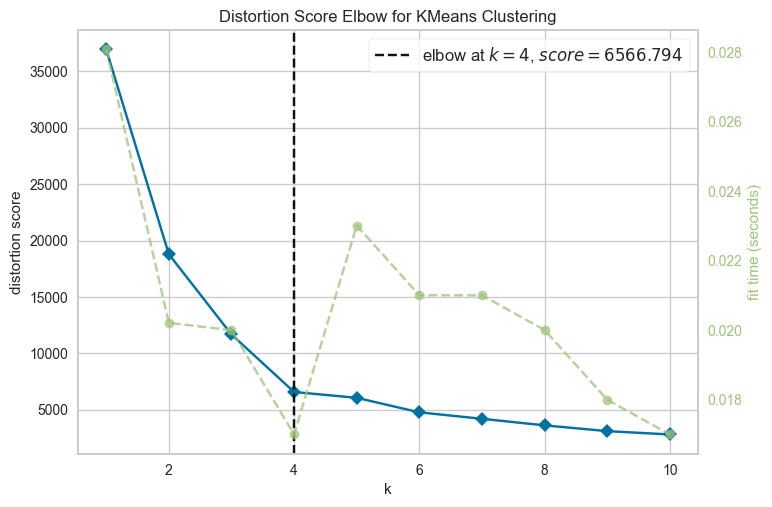

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# feature extraction
umap = UMAP(n_components=2, random_state=42)
data_selected = umap.fit_transform(new_df)
data_selected = pd.DataFrame(data_selected, columns=umap.get_feature_names_out())

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 11), locate_elbow=True)
visualizer.fit(data_selected)
visualizer.show()

In [21]:
umap_kmeans = KMeans(n_clusters=4, random_state=42).fit(data_selected)
labels = umap_kmeans.labels_

# cek silhouette score
sil_score = silhouette_score(data_selected, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.5166875123977661


Insight:
- Pada tahap ini dilakukan feature extraction untuk mempermudah melakukan visualisasi dari hasil clustering menggunakan K-Means dan didapatkan nilai silhouette score sebesar 0.51

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [22]:
selected_feature = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Efficiency_nm_per_kWh', 'Weekly_Voyage_Count']

df_selected = new_df[selected_feature].copy()

# clustering dengan fitur yg dipilih
kmeans = KMeans(n_clusters=4, random_state=42)
label_selected = kmeans.fit_predict(df_selected)

sil_score_after = silhouette_score(df_selected, label_selected)
print(f'Silhouette Score Sebelum Feature Selection: {sil_score:.3f}')
print(f'Silhouette Score Setelah Feature Selection: {sil_score_after:.3f}')

Silhouette Score Sebelum Feature Selection: 0.517
Silhouette Score Setelah Feature Selection: 0.307


Insight:
- Melakukan feature selection menggunakan 5 fitur yg penting dan dilakukan clustering kembali didapatkan penurunan silhouette score sebesar 0.30, jika dibandingkan sebelum melakukan feature selection yakni sebesar 0.51

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

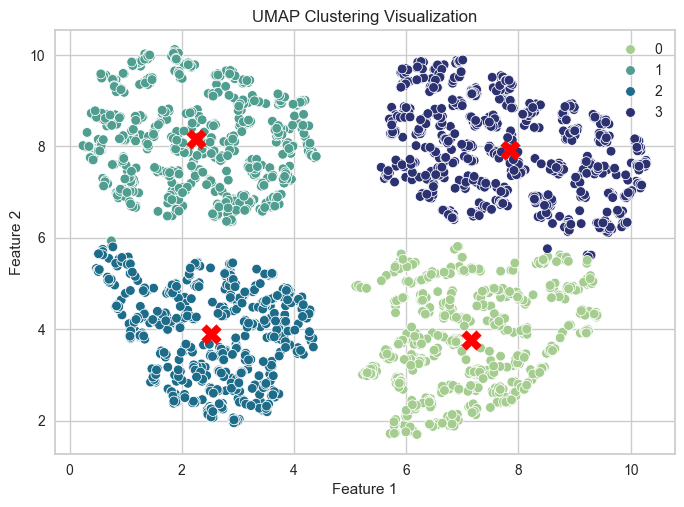

In [23]:
sns.scatterplot(x=data_selected['umap_component_1'], y=data_selected['umap_component_2'], hue=labels, palette='crest')
plt.scatter(umap_kmeans.cluster_centers_[:, 0], umap_kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("UMAP Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Insight:
- Berdasarkan visualiasi dari hasil clustering diatas, didapatkan bahwa perbedaan warna yg mewakilkan cluster yg berbeda dan memiliki karakteristik tertentu dari setiap fitur yg digunakan.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [24]:
# memasukkan labels cluster ke dalam dataframe
new_df['Cluster'] = labels

# inverse data dari fitur kategorikal
for x in categorical_features:
  new_df[x] = encoders[x].inverse_transform(data_encoded[x])

# inverse data dari fitur numerikal
inverse_data = scaler.inverse_transform(data_scaled)
inverse_data = pd.DataFrame(inverse_data, columns=numerical_features)
new_df[numerical_features] = inverse_data

new_df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,Moderate,12.597558,2062.983982,1030.943616,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1.0,93.769249,3
1,Fish Carrier,Short-haul,Steam Turbine,Good,Rough,10.387580,1796.057415,1060.486382,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6.0,93.895372,2
2,Container Ship,Long-haul,Diesel,Fair,Moderate,20.749747,1648.556685,658.874144,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9.0,96.218244,3
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate,21.055102,915.261795,1126.822519,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1.0,66.193698,0
4,Fish Carrier,Transoceanic,Diesel,Fair,Moderate,13.742777,1089.721803,1445.281159,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8.0,80.008581,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [25]:
summary = new_df.select_dtypes(exclude='object').groupby('Cluster').agg('mean')
summary[['Engine_Power_kW', 'Distance_Traveled_nm', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD']].round(2)

,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD
Cluster,,,,,
0,1738.81,1030.55,1044.60,257353.63,524709.18
1,1774.44,1069.09,1068.79,247816.67,517441.28
2,1776.69,1017.93,1011.26,261712.08,518516.61
3,1743.82,1026.29,1006.42,254800.05,524221.24


In [26]:
def modus_cluster(df, cluster_column, categorical_columns):
    modus_result = {}

    for column in categorical_columns:
        modus_per_cluster = df.groupby(cluster_column)[column].agg(lambda x: x.mode()[0]).reset_index()
        modus_result[column] = modus_per_cluster
    
    result_df = modus_result[categorical_columns[0]]
    for column in categorical_columns[1:]:
        result_df = result_df.merge(modus_result[column], on=cluster_column, how='left')
    
    column_names = [cluster_column] + [f'{col}' for col in categorical_columns]
    result_df.columns = column_names
    
    return result_df

modus_cluster(new_df, 'Cluster', categorical_features)

,Cluster,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
0,0,Bulk Carrier,Transoceanic,Diesel,Critical,Calm
1,1,Tanker,Long-haul,Diesel,Good,Calm
2,2,Fish Carrier,Short-haul,Diesel,Good,Calm
3,3,Bulk Carrier,Long-haul,Diesel,Good,Calm


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Engine Power (kW):** 1738.81
- **Rata-rata Distance Traveled (nm):** 1030.55
- **Rata-rata Cargo Weight (tons):** 1044.60
- **Rata-rata Operational Cost (USD):** 257353.63
- **Rata-rata Revenue per-Voyage (USD):** 524709.18
- **Profil Ship:** Bulk Carrier
- **Profil Route:** Transoceanic
- **Profil Engine :** Diesel
- **Profil Maintenance Status:** Critical
- **Profil Weather:** Calm
- **Analisis:** Cluster ini mencakup kapal Bulk Carrier yang melakukan pelayaran transoceanic (jarak jauh lintas samudera) dengan kondisi perawatan yg kritis (Critical), namun tetap dapat menghasilkan revenue tertinggi dengan beban kargo yang besar dan jarak tempuh yang relatif jauh. Meskipun kondisi perawatan berada dalam status Critical, kapal tetap beroperasi dengan efisiensi yang cukup baik. Tetapi, juga menunjukkan potensi adanya risiko dalam operasional yang berdampak pada keselamatan atau biaya perbaikan seiring waktu.

## Cluster 1:
- **Rata-rata Engine Power (kW):** 1774.44
- **Rata-rata Distance Traveled (nm):** 1069.09
- **Rata-rata Cargo Weight (tons):** 1068.79
- **Rata-rata Operational Cost (USD):** 247816.67
- **Rata-rata Revenue per-Voyage (USD):** 517441.28
- **Profil Ship:** Tanker
- **Profil Route:** Long-haul
- **Profil Engine :** Diesel
- **Profil Maintenance Status:** Good
- **Profil Weather:** Calm
- **Analisis:** Cluster ini mencakup kapal Tanker yang beroperasi pada rute long-haul dengan kondisi perawatan yang baik, jarak tempuh paling jauh, dan beban kargo tertinggi. Kapal dalam cluster ini memiliki biaya operasional terendah sehingga menjadikan cluster yg sangat efisien secara biaya meskipun revenue per-voyage sedikit lebih rendah dibanding cluster lain. Secara keseluruhan, cluster ini merupakan kelompok kapal yang stabil dan optimal dari segi profitabilitas dan keandalan.

## Cluster 2:
- **Rata-rata Engine Power (kW):** 1776.69
- **Rata-rata Distance Traveled (nm):** 1017.93
- **Rata-rata Cargo Weight (tons):** 1011.26
- **Rata-rata Operational Cost (USD):** 261712.08
- **Rata-rata Revenue per-Voyage (USD):** 518516.61
- **Profil Ship:** Fish Carrier
- **Profil Route:** Short-haul
- **Profil Engine :** Diesel
- **Profil Maintenance Status:** Good
- **Profil Weather:** Calm
- **Analisis:** Cluster ini berisi kapal Fish Carrier yang beroperasi pada rute short-haul dengan perawatan yang baik. Meskipun jarak tempuh dan muatan relatif lebih rendah, kapal dalam cluster ini memiliki biaya operasional tertinggi sehingga mengindikasikan bahwa jenis kapal ini kurang efisien secara biaya. Hal ini bisa disebabkan oleh operasional kapal pengangkut ikan yang membutuhkan fasilitas pendinginan atau manajemen rantai dingin yang intensif. Tetapi, revenue yg dihasilkan tetap tinggi menunjukkan nilai kargo (ikan) yang mungkin lebih tinggi per satuan berat.

## Cluster 3:
- **Rata-rata Engine Power (kW):** 1743.82
- **Rata-rata Distance Traveled (nm):** 1026.29
- **Rata-rata Cargo Weight (tons):** 1006.42
- **Rata-rata Operational Cost (USD):** 254800.05
- **Rata-rata Revenue per-Voyage (USD):** 524221.24
- **Profil Ship:** Bulk Carrier
- **Profil Route:** Long-haul
- **Profil Engine :** Diesel
- **Profil Maintenance Status:** Good
- **Profil Weather:** Calm
- **Analisis:** Cluster ini berisi kapal Bulk Carrier dengan rute long-haul, kondisi perawatan baik, dan stabil dari segi operasional. Revenue per-voyage sangat tinggi kedua setelah Cluster 0 dengan biaya operasional yang moderat atau sedang. Performa kapal dalam cluster ini seimbang dan optimal sehingga menjadikannya kandidat ideal untuk ekspansi operasional atau intensifikasi rute.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [27]:
new_df.to_csv('Dataset_clustering.csv', index=False)